# 1. Goal
<hr style="border:2px solid gray">
- predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period

#### Data Fields
- datetime - hourly date + timestamp  

*Categorical:*
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

*Numerical:*
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

# 2. Get Data
<hr style="border:2px solid gray">

### Read train data

In [1]:
import pandas as pd
df = pd.read_csv('../data/train.csv', index_col=0, parse_dates=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Check for missing values

In [2]:
df.info()
# there are no missing data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [3]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
# determine which columns are numerical and categorical
init_numerical_features = [
    'temp',
    'atemp',
    'humidity',
    'windspeed',
    'casual',
    'registered',
    'count'
]

init_categorical_features = [
    'season',
    'holiday',
    'workingday',
    'weather'
]

features = init_numerical_features + init_categorical_features

target_variable = 'count'

# 3. Exploratory Data Analysis
<hr style="border:2px solid gray">

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

sns.set_palette("colorblind")

In [6]:
# functions for plotting

def plot_lineplot(ax_val, x_val, y_val, hue_val, data_val, title_val):
    sns.lineplot(ax=ax_val, x=x_val, y=y_val, hue=hue_val, data=data_val, palette='flare')
    ax_val.set_title(title_val)
    ax_val.legend(loc='upper right')
    
def plot_barplot(ax_val, x_val, y_val, data_val, hue_val, title_val):
    sns.barplot(ax=ax_val, x=x_val, y=y_val, hue=hue_val, data=data_val, palette='flare')
    ax_val.set_title(title_val)


## 3.1 Categorical data

To make the categories readable for visualization, we will map the numbered categories to readable texts

In [7]:
def update_cat_features(dataframe):
    season_mapping = { 1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter' }
    weather_mapping = { 1:'Clear', 2:'Cloudy', 3:'LightSnowLightRain', 4:'HeavyRain'}
    
    # update data type to category
    for category in init_categorical_features:
        if dataframe[category].dtype.name != 'category':
            dataframe[category] = dataframe[category].astype('category')

    # map season and weather values to each row
    dataframe['season'] = dataframe['season'].apply(
        lambda x: season_mapping[x] if x not in season_mapping.values() else x)
    dataframe['weather'] = dataframe['weather'].apply(
        lambda x: weather_mapping[x] if x not in weather_mapping.values() else x)

    return dataframe

In [8]:
df = update_cat_features(df)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1


### Plot Categorical Data

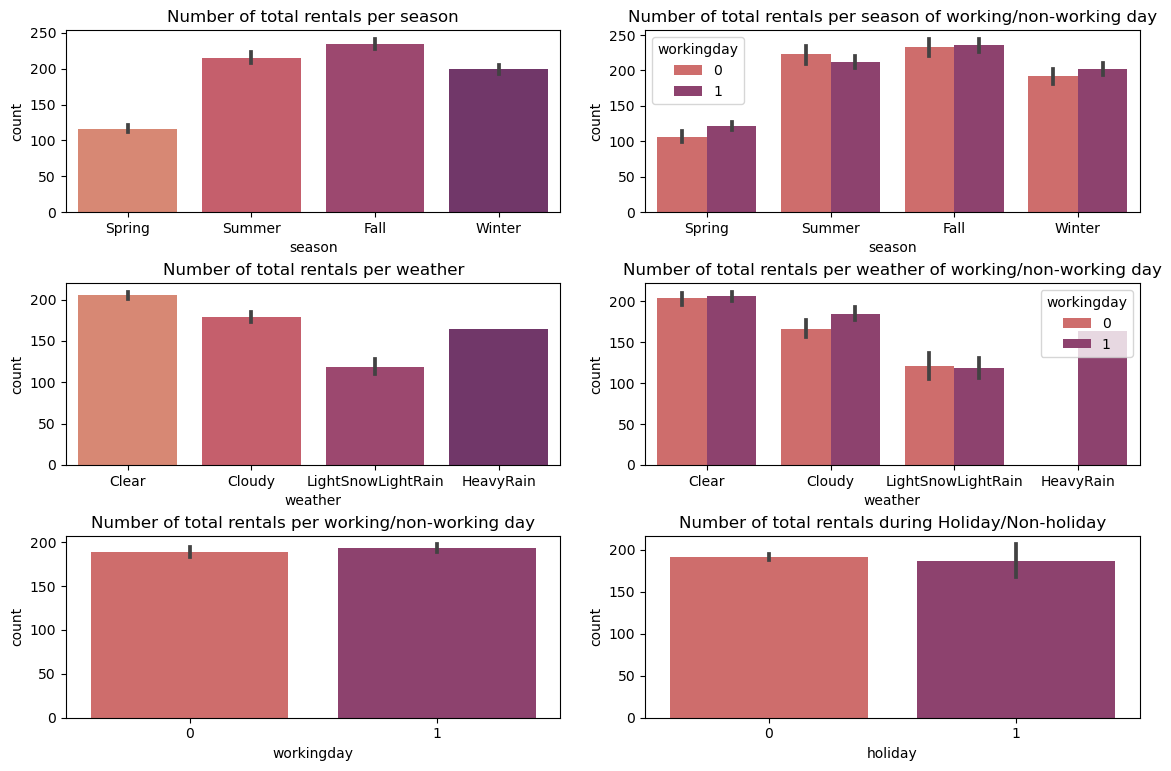

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8), squeeze=True)
plt.tight_layout(pad=3)

plot_barplot(axes[0,0], 'season', 'count', df, None, 'Number of total rentals per season')
plot_barplot(axes[0,1], 'season', 'count', df, 'workingday', 'Number of total rentals per season of working/non-working day')
plot_barplot(axes[1,0], 'weather', 'count', df, None, 'Number of total rentals per weather')
plot_barplot(axes[1,1], 'weather', 'count', df, 'workingday', 'Number of total rentals per weather of working/non-working day')
plot_barplot(axes[2,0], 'workingday', 'count', df, None, 'Number of total rentals per working/non-working day')
plot_barplot(axes[2,1], 'holiday', 'count', df, None, 'Number of total rentals during Holiday/Non-holiday')

plt.show()

**Analysis**
- Season: Bike rentals are high in Fall and Summer, and is lowest in Spring. There is not much difference for rentals on working and non-working days.
- Weather: Bike rentals are high when the weather is Clear or Mist+Cloudy.
- Working day and holidays doesn't show much difference in bike rentals.

**From the datetimeindex, create new features that we could use for EDA**

In [10]:
def split_datetime(dataframe):
    # create new features: year, month, day_name, hour
    dataframe['year'] = dataframe.index.year
    dataframe['month'] = dataframe.index.month
    dataframe['day_name'] = dataframe.index.day_name().astype(str)
    dataframe['hour'] = dataframe.index.hour
    return dataframe

In [11]:
df = split_datetime(df)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_name,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,Saturday,0
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,Saturday,1
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,Saturday,2
2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011,1,Saturday,3
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011,1,Saturday,4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int64   
 12  month       10886 non-null  int64   
 13  day_name    10886 non-null  object  
 14  hour        10886 non-null  int64   
dtypes: category(4), float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
season_group = df.groupby(['season','month'])['count'].mean().unstack(1)
season_group

month,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
Spring,90.366516,110.00333,148.169811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Summer,NaN,NaN,NaN,184.160616,219.45943,242.031798,NaN,NaN,NaN,NaN,NaN,NaN
Fall,NaN,NaN,NaN,NaN,NaN,NaN,235.325658,234.118421,233.805281,NaN,NaN,NaN
Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.699232,193.677278,175.614035


<Axes: xlabel='hour', ylabel='count'>

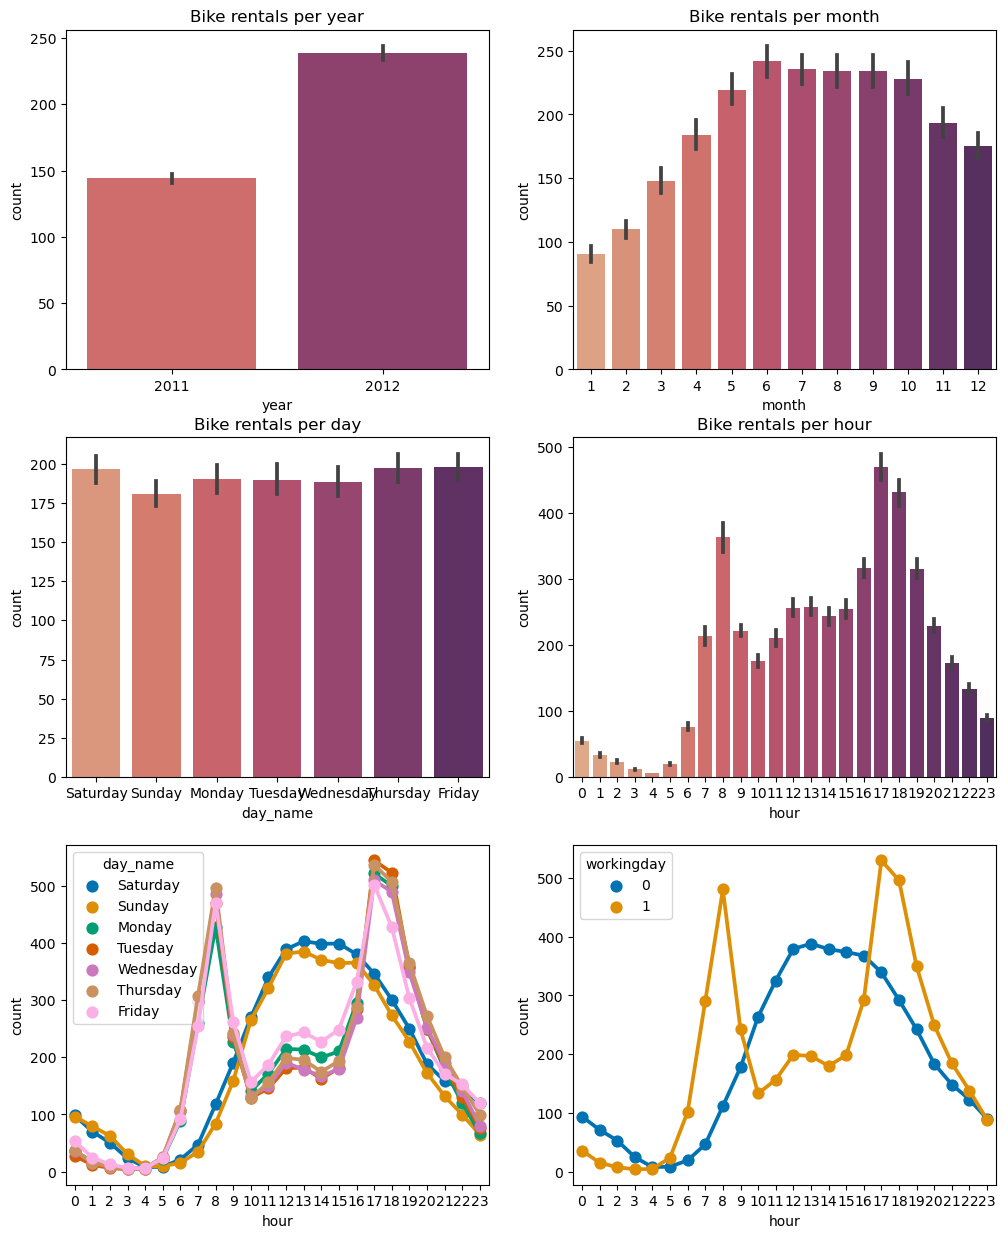

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15), squeeze=True)

plot_barplot(axes[0,0], 'year', 'count', df, None, 'Bike rentals per year')
plot_barplot(axes[0,1], 'month', 'count', df, None, 'Bike rentals per month')
plot_barplot(axes[1,0], 'day_name', 'count', df, None, 'Bike rentals per day')
plot_barplot(axes[1,1], 'hour', 'count', df, None, 'Bike rentals per hour')

sns.pointplot(ax=axes[2,0],x='hour',y='count',data=df,hue='day_name',errorbar=None)
sns.pointplot(ax=axes[2,1],x='hour',y='count',data=df,hue='workingday',errorbar=None)


**Analysis**
- There has been an increase in bike rentals from 2011 to 2012
- June has the highest bike rental count and January has the lowest. From May to October is the range with high bike rentals.
- On weekdays, the peak of bike rentals is between 7 to 9am and 4 to 7pm.
- On weekends, bike rentals are high between 10am to 6pm.

## 3.2 Numerical data

### Check correlation

<Axes: >

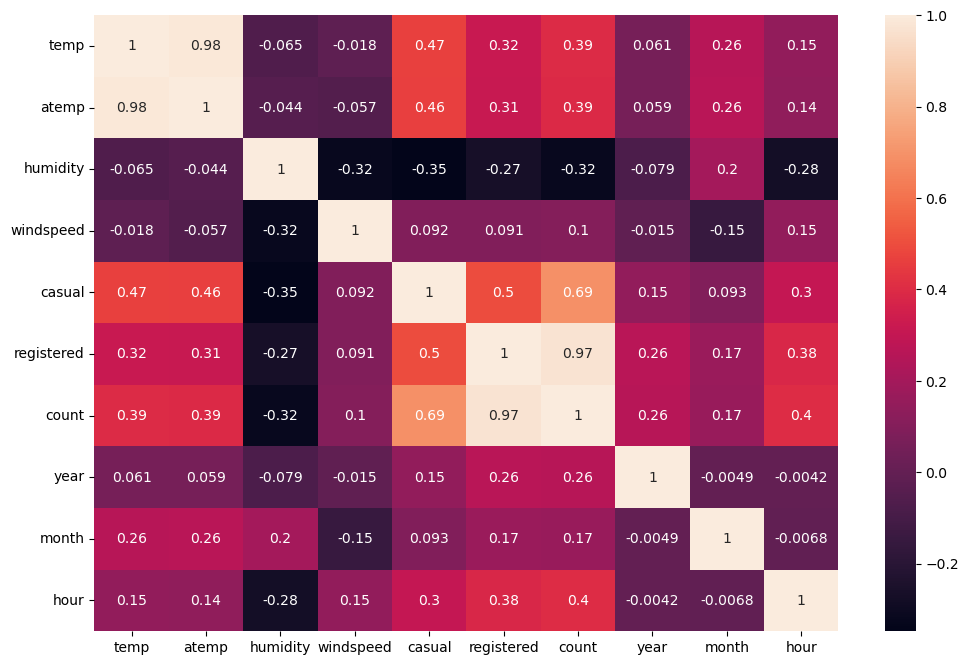

In [15]:
# check heatmap for correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# sns.pairplot(df,vars=['temp','humidity','windspeed','count','year','month','hour'])

**Analysis**
- temp and atemp are highly correlated
- registered, count, and casual are highly correlated
- windspeed has a low correlation with count

### Plot numerical data

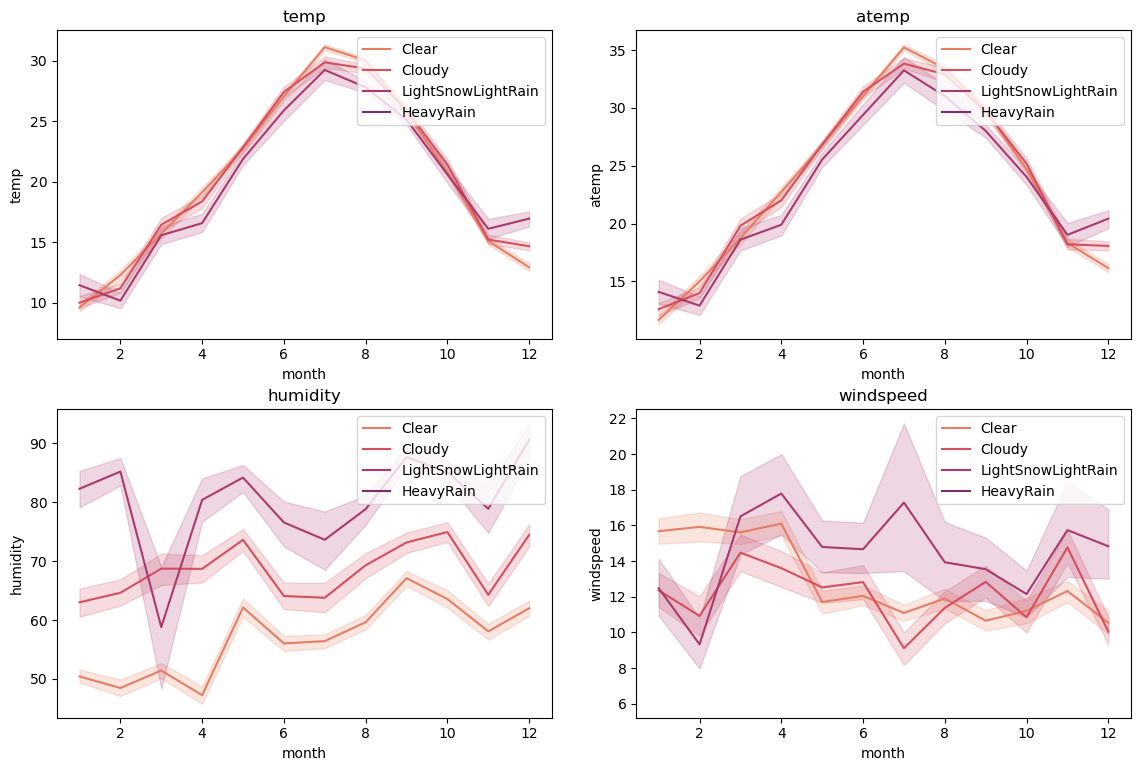

In [16]:
# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), squeeze=True)

# adjust padding
plt.tight_layout(pad=3)

plot_lineplot(axes[0,0], 'month', 'temp', 'weather', df, 'temp')
plot_lineplot(axes[0,1], 'month', 'atemp', 'weather', df, 'atemp')
plot_lineplot(axes[1,0], 'month', 'humidity', 'weather', df, 'humidity')
plot_lineplot(axes[1,1], 'month', 'windspeed', 'weather', df, 'windspeed')

plt.show()

From the plots above, we can see that atemp and temp have almost the same values. One of them can be dropped. 

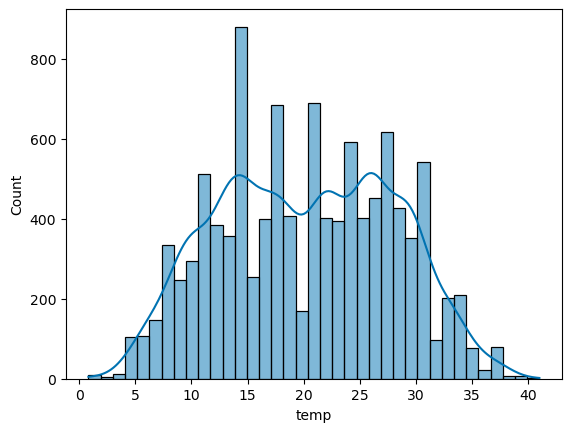

In [17]:
sns.histplot(data=df,x='temp',kde=True)
plt.show()

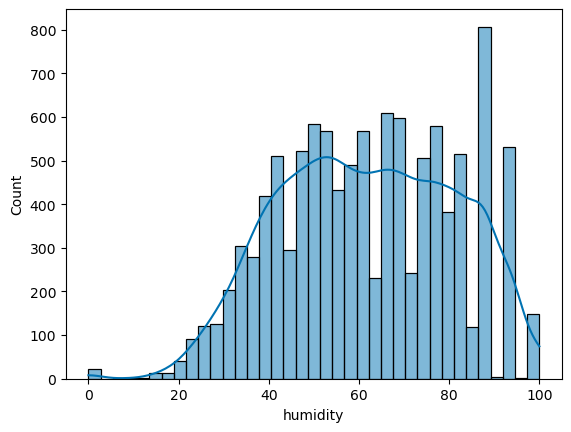

In [18]:
sns.histplot(data=df,x='humidity',kde=True)
plt.show()

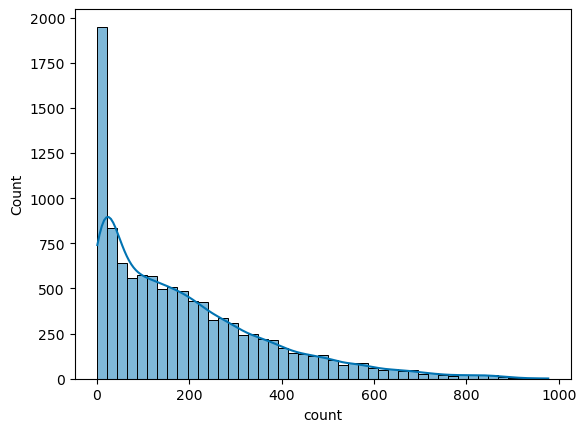

In [19]:
sns.histplot(data=df,x='count',kde=True)
plt.show()

### Drop features

In [20]:
df.drop(columns=['registered','casual','atemp','windspeed'], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,humidity,count,year,month,day_name,hour
datetime,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,81,16,2011,1,Saturday,0
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,80,40,2011,1,Saturday,1
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,80,32,2011,1,Saturday,2
2011-01-01 03:00:00,Spring,0,0,Clear,9.84,75,13,2011,1,Saturday,3
2011-01-01 04:00:00,Spring,0,0,Clear,9.84,75,1,2011,1,Saturday,4


In [21]:
df['weather'].value_counts()
# heavy rain has only 1 row

Clear                 7192
Cloudy                2834
LightSnowLightRain     859
HeavyRain                1
Name: weather, dtype: int64

In [22]:
# change heavy rain to lightsnowlightrain to not have the outlier

df.loc[df['weather']=='HeavyRain','weather']='LightSnowLightRain'
df.loc['2012-01-09']

,season,holiday,workingday,weather,temp,humidity,count,year,month,day_name,hour
datetime,,,,,,,,,,,
2012-01-09 00:00:00,Spring,0,1,Clear,9.84,60,15,2012,1,Monday,0
2012-01-09 01:00:00,Spring,0,1,Clear,9.84,60,5,2012,1,Monday,1
2012-01-09 02:00:00,Spring,0,1,Clear,9.84,56,5,2012,1,Monday,2
2012-01-09 03:00:00,Spring,0,1,Clear,9.84,52,3,2012,1,Monday,3
2012-01-09 04:00:00,Spring,0,1,Clear,9.02,64,4,2012,1,Monday,4
2012-01-09 05:00:00,Spring,0,1,Cloudy,8.20,64,21,2012,1,Monday,5
2012-01-09 06:00:00,Spring,0,1,Cloudy,9.02,60,88,2012,1,Monday,6
2012-01-09 07:00:00,Spring,0,1,Cloudy,9.02,60,240,2012,1,Monday,7
2012-01-09 08:00:00,Spring,0,1,Cloudy,9.02,55,420,2012,1,Monday,8


# 4. Split Train-Validation(Test)
<hr style="border:2px solid gray">

In [23]:
from sklearn.model_selection import train_test_split, cross_validate
# different feature combinations
df_train_1 = df[['season','weather','workingday','hour','temp','humidity']].reset_index(drop=True).copy()
df_train_2 = df[['season','weather','workingday','hour','temp','humidity','month']].reset_index(drop=True).copy()

#feature
X = df_train_2

#target
y = df['count']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8164, 7), (2722, 7), (8164,), (2722,))

# 5. Feature Engineering
<hr style="border:2px solid gray">

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso


from sklearn import set_config
set_config(transform_output='pandas')

## 5.1 Baseline Model

Using the BaselineModel from the example in Linear Regression Encounter Notes

In [25]:
class BaselineModel:
    """
    Baseline model predicting only the mean value of the target variable
    """
    def predict(self,X):
        y_mean = y_train.mean()
        return [y_mean]*X.shape[0]

In [26]:
from sklearn.metrics import r2_score

y_baseline_train_pred = BaselineModel().predict(X_train)
r2 = r2_score(y_train,y_baseline_train_pred)

print(f'baseline model train score: {round(r2,6)}')

baseline model train score: 0.0


In [27]:
y_baseline_pred = BaselineModel().predict(X_val)
r2 = r2_score(y_val,y_baseline_pred)
r2

-2.6768333728499627e-05

In [28]:
print(f'baseline model test score: {round(r2,6)}')

baseline model test score: -2.7e-05


The r2 score of the baseline model implies that there is no linear relationship between the independent variables and the target variable that can be captured by the mean value.

## 5.2 Model Building

### Preprocessing

In [29]:
categorical_features = ['season','weather','workingday','hour','month']
numerical_features = ['temp','humidity']

- Apply OneHotEncoder to categorical features like season, weather, workingday to convert them to numerical data
- Apply customized binning to hour
- Apply scaling to temp and humidity

<font color="red"> **Didn't use this hour_binner anymore** </font>

In [30]:
# put hours in different discrete bins to group range of hours
def hour_binner(df):
    # Define bin labels
    cut_labels = ['early_morning','late_morning','midday','late_afternoon','night']
    
    # Define bin edges
    cut_bins = [-1,7,9,16,20,23]

    # Create a new column grouping hour into time range
    df['hour_range'] = pd.cut(df['hour'], bins=cut_bins, labels=cut_labels)
    return df[['hour_range']]


https://towardsdatascience.com/feature-engineering-examples-binning-numerical-features-7627149093d

In [31]:
# hour transformer
# declare the customized transformer
hour_transformer = FunctionTransformer(hour_binner)

# Create a pipeline for hour
pipeline_hour = Pipeline(
    [
        ('hour_binner', hour_transformer),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
    ]
)

**Start of defining pipelines and column transformers**

In [32]:
numerical_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('polynomial', PolynomialFeatures())
    ]
)

In [33]:
categorical_transformer = Pipeline(
    steps=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))
    ]
)

In [34]:
# Create a column transformer for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

Reference for creating multiple models:   https://www.youtube.com/watch?v=v2QpvCJ1ar8

**Define models**

In [35]:
# models
m_lasso = Lasso(random_state=42)
m_poisson = PoissonRegressor()
m_lr = RandomForestRegressor(random_state=42)

In [36]:
pipe = Pipeline([
        ('preprocessor', preprocessor),   # preprocessing step
        ('classifier', Lasso()) 
        # put any classifier but this will be replaced in the pipeline
    ]
)

In [37]:
# Create a function to get the parameters set in each model
def get_parameters(model):
    match model:
        case 'lasso':
            return {
                'preprocessor__num__polynomial__degree' : [2,3],
                'preprocessor__num__polynomial__interaction_only' : [False,True],
                'classifier__alpha' : [1.,0.1,0.01],
                'classifier__max_iter' : [1_000,500],
                'classifier' : [m_lasso]
            }
        case 'poisson':
            return {
                'preprocessor__num__polynomial__degree' : [2,3],
                'preprocessor__num__polynomial__interaction_only' : [False,True],
                'classifier__alpha' : [1.,0.1,0.01,0.05],
                'classifier__max_iter' : [1_000,500],
                'classifier' : [m_poisson]
            }
        case 'random_forest':
            return{
                'preprocessor__num__polynomial__degree' : [2,3],
                'preprocessor__num__polynomial__interaction_only' : [False,True],
                'classifier__max_depth' : [5,10],
                'classifier__n_estimators' : [50,100],
                'classifier' : [m_lr]
            }
        case default:
            return {
                'preprocessor__num__polynomial__degree' : [2,3],
                'preprocessor__num__polynomial__interaction_only' : [False,True],
            }

In [38]:
param_lasso = get_parameters('lasso')
param_poisson = get_parameters('poisson')
param_rf = get_parameters('random_forest')
param_lasso, param_poisson, param_rf

({'preprocessor__num__polynomial__degree': [2, 3],
  'preprocessor__num__polynomial__interaction_only': [False, True],
  'classifier__alpha': [1.0, 0.1, 0.01],
  'classifier__max_iter': [1000, 500],
  'classifier': [Lasso(random_state=42)]},
 {'preprocessor__num__polynomial__degree': [2, 3],
  'preprocessor__num__polynomial__interaction_only': [False, True],
  'classifier__alpha': [1.0, 0.1, 0.01, 0.05],
  'classifier__max_iter': [1000, 500],
  'classifier': [PoissonRegressor()]},
 {'preprocessor__num__polynomial__degree': [2, 3],
  'preprocessor__num__polynomial__interaction_only': [False, True],
  'classifier__max_depth': [5, 10],
  'classifier__n_estimators': [50, 100],
  'classifier': [RandomForestRegressor(random_state=42)]})

In [39]:
# create a list of parameter dictionaries
param_list = [param_lasso, param_poisson, param_rf]

**Grid-search cross-validation**

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
gscv = GridSearchCV(
    estimator=pipe,
    param_grid=param_list,
    scoring='r2',
    cv=5, 
    n_jobs=-1,
    verbose=1
)

**Grid-search cross validation**

In [42]:
# get log value
ylog = np.log1p(y_train)
ylog_val = np.log1p(y_val)

In [ ]:
import time
# initial time
ti = time.time()

# grid-search cross-validation
gscv.fit(X_train,ylog)

# final time 
tf = time.time()

# time taken
print(f"time taken: {round(tf-ti,2)} sec")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


**Cross validation results**

In [ ]:
def get_cv_results(cv_results):
    # list of columns to show
    column_list = ['param_classifier',
                   'param_preprocessor__num__polynomial__degree',
                   'param_preprocessor__num__polynomial__interaction_only',
                   'param_classifier__alpha',
                   'param_classifier__max_iter',
                   'param_classifier__max_depth',
                   'param_classifier__n_estimators',
                   'mean_test_score',
                   'std_test_score',
                   'rank_test_score'
                  ]

    # create result dataframe
    result_df = pd.DataFrame(cv_results)[column_list]

    # rename columns
    result_df.rename(
        columns=lambda name: name.split('__')[-1],inplace=True
    )

    # order by rank
    result_df.sort_values(
        by='rank_test_score', ascending=True, inplace=True, ignore_index=True
    )
    return result_df

In [ ]:
df_gscv_result = get_cv_results(gscv.cv_results_)
df_gscv_result.head(50)

**Best hyperparameter**

In [ ]:
gscv.best_params_

{'lasso__alpha': 0.01,
 'lasso__max_iter': 1000,
 'preprocessor__num__polynomial__degree': 2,
 'preprocessor__num__polynomial__interaction_only': False}

score result: 0.751913


{'classifier': PoissonRegressor(alpha=0.01, max_iter=1000),
 'classifier__alpha': 0.01,
 'classifier__max_iter': 1000,
 'preprocessor__num__polynomial__degree': 2,
 'preprocessor__num__polynomial__interaction_only': False}
 
score result: 0.796779 

**Best score**

In [ ]:
round(gscv.best_score_,6)

**Model selection**

In [ ]:
best_model = gscv.best_estimator_
best_model

**Build model**

In [ ]:
best_model.fit(X_train,ylog);

In [ ]:
# training score
training_score = best_model.score(X_train,ylog)

# test score
test_score = best_model.score(X_val,ylog_val)

print(f'Train score: {round(training_score,6)}')
print(f'Test score : {round(test_score,6)}')

**Predict**

In [ ]:
ypredlog = best_model.predict(X_train)
ypredlog

**Mean squared error**

In [ ]:
from sklearn.metrics import mean_squared_error

mean_sq_error_train = np.sqrt(mean_squared_error(ylog, ypredlog))

print("Mean squared error on the train set:\n"
    f"{mean_sq_error_train}")

In [ ]:
ypredlog_val = best_model.predict(X_val)

mean_sq_error_val = np.sqrt(mean_squared_error(ylog_val, ypredlog_val))

print("Mean squared error on the validation set:\n"
    f"{mean_sq_error_val}")

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

# model training
best_model.fit(X_train, ylog)  

# predict
ypredlog = best_model.predict(X_train)
# y_pred

# To bring back your log predictions to the original scale you have to apply the inverse transformation on the predictions
ypred = np.exp(ypredlog)-1
#ypred
np.sqrt(mean_squared_error(ylog, ypredlog))

# X_FE.head()

In [ ]:
ypredlog_val = best_model.predict(X_val)

np.sqrt(mean_squared_error(ylog_val, ypredlog_val))

## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rscv = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_list,
    scoring='r2',
    cv=5, 
    n_jobs=-1,
    verbose=1,
    n_iter=20
)

In [ ]:
import time
# initial time
ti = time.time()

# grid-search cross-validation
rscv.fit(X_train,ylog)

# final time 
tf = time.time()

# time taken
print(f"time taken: {round(tf-ti,2)} sec")

In [ ]:
df_rscv_result = get_cv_results(rscv.cv_results_)
df_rscv_result.head(50)

# 6. Test Data
<hr style="border:2px solid gray">

Now that we have already found the model to use based from the GridSearchCV, we can now apply it to the test data.
I haven't found out a way to directly use the best_model from the GridSearchCV to the test data. So I will repeat to fit the model with the train data and then predict to the test.

### Read test data

In [ ]:
df_test = pd.read_csv('../data/test.csv', index_col=0, parse_dates=True)
df_test.head()

### Preprocess test data as how we transformed the train data

In [ ]:
df_test = update_cat_features(df_test)
df_test = split_datetime(df_test)
df_test.head()

In [ ]:
df_test.drop(columns=['atemp','windspeed'], axis=1, inplace=True)
df_test.head()

In [ ]:
df_test['weather'].value_counts()

In [ ]:
# change heavy rain to lightsnowlightrain for the outliers

df_test.loc[df_test['weather']=='HeavyRain','weather']='LightSnowLightRain'
df_test.loc['2012-01-21']
# df_test.loc[df_test['weather']=='HeavyRain']

### Feature engineer

**Train Data**

In [ ]:
poly_params = {
    'num__polynomial__degree': 2,
    'num__polynomial__interaction_only': False
}

In [ ]:
# initialize model
poisson_reg = PoissonRegressor(alpha=0.01,max_iter=500)

In [ ]:
# set polynomialFeatures parameters
preprocessor.set_params(**poly_params)

In [ ]:
X_train_FE = preprocessor.fit_transform(X_train)
X_train_FE.head()

In [ ]:
# train the model
poisson_reg.fit(X_train_FE,ylog)

# predict train
ypredlog_train = poisson_reg.predict(X_train_FE)
ypredlog_train

np.sqrt(mean_squared_error(ylog, ypredlog_train))

**Test Data**

In [ ]:
# transform
X_test_FE = preprocessor.transform(df_test)
X_test_FE.head()

In [ ]:
# predict
ypredlog_test = poisson_reg.predict(X_test_FE)
ypredlog_test

# convert back the log prediction to original scale
ypred_test = np.exp(ypredlog_test)-1
ypred_test

In [ ]:
df_submit = df_test.copy().reset_index()[['datetime']]
df_submit

In [ ]:
submission = pd.DataFrame({
        "datetime": df_submit["datetime"],
        "count": ypred_test
    })

In [ ]:
#to make a df out of the array (prediction)
#save it as csv:
submission.to_csv("submission.csv", index=False)